In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

C:\Users\28574\AppData\Local\Temp\ipykernel_25304\255315770.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  Reflectance[i] = R


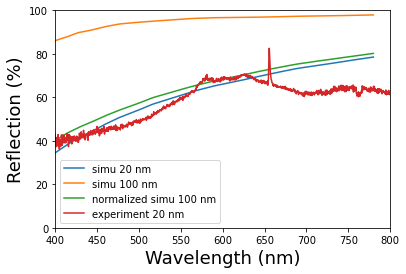

In [7]:
dir='E:\Files\Year4\Year4.2\OptoDevFab\pyworkspace\lab2\Class2_lab2'
list=os.listdir(dir)
data=pd.read_csv(dir+'/'+list[2],sep='\t',skiprows=17,header=None)
data=data.drop(data.shape[0]-1).to_numpy(dtype=float)
Ag = pd.read_csv('Lab2-nk-Ag.txt', sep='\t', header=None).to_numpy(dtype=float)
n_Ag_list = Ag[:, 1] + 1j * Ag[:, 2]
Alq = pd.read_csv('Lab2-nk-Alq.txt', sep='\t', header=None).to_numpy(dtype=float)
n_Alq_list = Alq[:, 1] + 1j * Alq[:, 2]
Glass=pd.read_csv('Lab2-nk-glass.txt', sep='\t', header=None).to_numpy(dtype=float)
n_glass_list=Glass[:,1]+1j*Glass[:,2]
global wavelength
wavelength = Ag[:, 0] * 1e-9
d1=20e-9
d2=100e-9
def cal_spec(d):
    global wavelength
    Reflectance = np.zeros((len(wavelength), 1), dtype=float)
    for i in range(0, len(wavelength)):
        # for i in range(0,1):
        n_Ag = n_Ag_list[i]
        n_Alq = n_Alq_list[i]
        n_glass=n_glass_list[i]
        n_air = 1

        t_01 = 2 * n_air / (n_air + n_Ag)
        r_01 = (n_air - n_Ag) / (n_air + n_Ag)
        I_01 = np.array([[1, r_01], [r_01, 1]]) / t_01

        L1 = np.array([[np.exp(-1j * 2 * np.pi * (n_Ag) * d / wavelength[i]), 0],
                       [0, np.exp(1j * 2 * np.pi * (n_Ag) * d / wavelength[i])]])

        t_12 = 2 * n_Ag / (n_glass + n_Ag)
        r_12 = (n_Ag - n_glass) / (n_glass + n_Ag)
        I_12 = np.array([[1, r_12], [r_12, 1]]) / t_12

        # L2 = np.array([[np.exp(-1j * 2 * np.pi * (n_glass) * d2 / wavelength[i]), 0],
        #                [0, np.exp(1j * 2 * np.pi * (n_glass) * d2 / wavelength[i])]])
        #
        # t_23 = 2 * n_glass / (n_glass + n_air)
        # r_23 = (n_glass-n_air) / (n_glass + n_air)
        # I_23 = np.array([[1, r_23], [r_23, 1]]) / t_23
        # S = I_01 @ L1 @ I_12 @ L2 @ I_23
        S = I_01 @ L1 @ I_12
        r = S[1, 0] / S[0, 0]
        R = r * np.conj(r)
        Reflectance[i] = R
    return Reflectance
Reflectance1=cal_spec(d1)
Reflectance2=cal_spec(d2)
fig1=plt.figure()
plt.plot(wavelength*1e9,Reflectance1*100)
plt.plot(wavelength*1e9,Reflectance2*100)
plt.plot(wavelength*1e9,Reflectance1/Reflectance2*100)
plt.plot(data[:,0],data[:,1])
plt.legend(['simu 20 nm','simu 100 nm','normalized simu 100 nm','experiment 20 nm'])
plt.xlabel('Wavelength (nm)',fontsize=18)
plt.ylabel('Reflection (%)',fontsize=18)
plt.xlim(400,800)
plt.ylim(0,100)
plt.show()
fig1.savefig("E:/Files/Year4/Year4.2/OptoDevFab/lab_reports/lab2/latex/4.png", dpi=300, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto',
            backend=None
            )

In [47]:
a1=(95.7+97)/2
a2=92.7
a3=94
print(a1/a3)
print(a2/a3)
plt.show()

1.025
0.9861702127659575


C:\Users\28574\AppData\Local\Temp\ipykernel_25304\1391762141.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  Reflectance[i] = R
C:\Users\28574\AppData\Local\Temp\ipykernel_25304\1391762141.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  Reflectance[i] = R


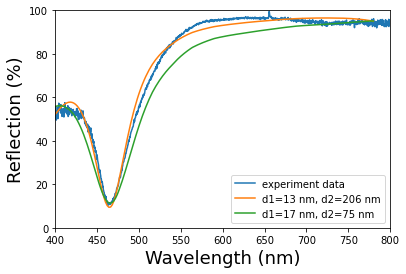

In [8]:
dir='E:\Files\Year4\Year4.2\OptoDevFab\pyworkspace\lab2\Class2_lab2'
list1=os.listdir(dir)
data=pd.read_csv(dir+'/'+list1[8],sep='\t',skiprows=17,header=None)
data=data.drop(data.shape[0]-1).to_numpy(dtype=float)
wavelength=Ag[:, 0] * 1e-9
def cal_spectrum(d1,d2):

    Reflectance = np.zeros((len(wavelength), 1), dtype=float)
    for i in range(0, len(wavelength)):
        # for i in range(0,1):
        n_Ag = n_Ag_list[i]
        n_Alq = n_Alq_list[i]
        n_air = 1
        t_01 = 2 * n_air / (n_air + n_Ag)
        r_01 = (n_air - n_Ag) / (n_air + n_Ag)
        I_01 = np.array([[1, r_01], [r_01, 1]]) / t_01
        L1 = np.array([[np.exp(-1j * 2 * np.pi * (n_Ag) * d1 / wavelength[i]), 0],
                       [0, np.exp(1j * 2 * np.pi * (n_Ag) * d1 / wavelength[i])]])
        t_12 = 2 * n_Ag / (n_Alq + n_Ag)
        r_12 = (n_Ag - n_Alq) / (n_Alq + n_Ag)
        I_12 = np.array([[1, r_12], [r_12, 1]]) / t_12
        L2 = np.array([[np.exp(-1j * 2 * np.pi * (n_Alq) * d2 / wavelength[i]), 0],
                       [0, np.exp(1j * 2 * np.pi * (n_Alq) * d2 / wavelength[i])]])
        t_23 = 2 * n_Alq / (n_Alq + n_Ag)
        r_23 = (n_Alq - n_Ag) / (n_Alq + n_Ag)
        I_23 = np.array([[1, r_23], [r_23, 1]]) / t_23
        S = I_01 @ L1 @ I_12 @ L2 @ I_23
        r = S[1, 0] / S[0, 0]
        R = r * np.conj(r)
        Reflectance[i] = R
    return Reflectance





fig2=plt.figure()
plt.plot(data[:,0],data[:,1])
plt.plot(wavelength*1e9,cal_spectrum(13e-9,206e-9)*100)
plt.plot(wavelength*1e9,cal_spectrum(17e-9,75e-9)*100)
plt.xlim(400,800)
plt.ylim(0,100)
plt.legend(['experiment data','d1=13 nm, d2=206 nm','d1=17 nm, d2=75 nm'])
plt.xlabel('Wavelength (nm)',fontsize=18)
plt.ylabel('Reflection (%)',fontsize=18)
plt.show()
fig2.savefig("E:/Files/Year4/Year4.2/OptoDevFab/lab_reports/lab2/latex/8.png", dpi=600, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto',
            backend=None
            )





C:\Users\28574\AppData\Local\Temp\ipykernel_25304\516975172.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  Reflectance[i] = R
C:\Users\28574\AppData\Local\Temp\ipykernel_25304\516975172.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  Transmission[i]=1/(S[0,0]* np.conj(S[0,0]))*n_glass/n_air


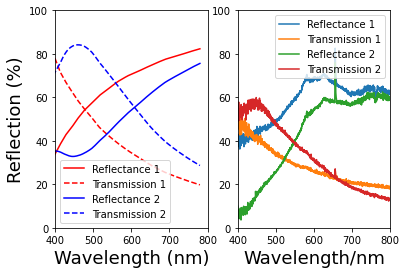

In [9]:
wavelength=Ag[:, 0] * 1e-9
dir='E:\Files\Year4\Year4.2\OptoDevFab\pyworkspace\lab2\Class2_lab2'
def cal_spec_3(d1,d2):
    Reflectance = np.zeros((len(wavelength), 1), dtype=float)
    Transmission = np.zeros((len(wavelength), 1), dtype=float)
    for i in range(0, len(wavelength)):
        # for i in range(0,1):
        n_Ag = n_Ag_list[i]
        n_Alq = n_Alq_list[i]
        n_glass=n_glass_list[i]
        n_air = 1
        t_01 = 2 * n_air / (n_air + n_Ag)
        r_01 = (n_air - n_Ag) / (n_air + n_Ag)
        I_01 = np.array([[1, r_01], [r_01, 1]]) / t_01
        L1 = np.array([[np.exp(-1j * 2 * np.pi * (n_Ag) * d1 / wavelength[i]), 0],
                       [0, np.exp(1j * 2 * np.pi * (n_Ag) * d1 / wavelength[i])]])
        t_12 = 2 * n_Ag / (n_Alq + n_Ag)
        r_12 = (n_Ag - n_Alq) / (n_Alq + n_Ag)
        I_12 = np.array([[1, r_12], [r_12, 1]]) / t_12
        L2 = np.array([[np.exp(-1j * 2 * np.pi * (n_Alq) * d2 / wavelength[i]), 0],
                       [0, np.exp(1j * 2 * np.pi * (n_Alq) * d2 / wavelength[i])]])
        t_23 = 2 * n_Alq / (n_Alq + n_air)
        r_23 = (n_Alq - n_air) / (n_Alq + n_air)
        I_23 = np.array([[1, r_23], [r_23, 1]]) / t_23
        S = I_01 @ L1 @ I_12 @ L2 @ I_23
        r = S[1, 0] / S[0, 0]
        R = r * np.conj(r)
        Reflectance[i] = R
        Transmission[i]=1/(S[0,0]* np.conj(S[0,0]))*n_glass/n_air
    return Reflectance,Transmission
fig3=plt.figure()
plt.subplot(1,2,1)
[R1,T1]=cal_spec_3(20e-9,0e-9)
[R2,T2]=cal_spec_3(20e-9,40e-9)
plt.plot(wavelength*1e9,R1*100,'r-')
plt.plot(wavelength*1e9,T1*100,'r',linestyle='dashed')
plt.plot(wavelength*1e9,R2*100,'b-')
plt.plot(wavelength*1e9,T2*100,'b',linestyle='dashed')
plt.legend(['Reflectance 1','Transmission 1','Reflectance 2','Transmission 2'])
plt.xlim(400,800)
plt.ylim(0,100)
# plt.legend(['experiment data','d1=13nm, d2=206nm','d1=17nm, d2=75nm'])
plt.xlabel('Wavelength (nm)',fontsize=18)
plt.ylabel('Reflection (%)',fontsize=18)

seq=np.array([2,3,4,5])
plt.subplot(1,2,2)
for i in range(0,len(seq)):
    data=pd.read_csv(dir+'/'+list[seq[i]],sep='\t',skiprows=17,header=None)
    data=data.drop(data.shape[0]-1).to_numpy(dtype=float)

    plt.plot(data[:,0],data[:,1])
    # if i==0:
    #     plt.plot(data[:,0],data[:,1],'r-')
    # if i==1:
    #     plt.plot(data[:,0],data[:,1],'r',linestyle='dashed')
    # if i==2:
    #     plt.plot(data[:,0],data[:,1],'b-')
    # if i==3:
    #     plt.plot(data[:,0],data[:,1],'b',linestyle='dashed')
plt.legend(['Reflectance 1','Transmission 1','Reflectance 2','Transmission 2'])



plt.xlim(400,800)
plt.ylim(0,100)
plt.xlabel('Wavelength/nm',fontsize=18)
plt.show()
fig3.savefig("E:/Files/Year4/Year4.2/OptoDevFab/lab_reports/lab2/latex/9.png", dpi=600, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto',
            backend=None
            )

In [1]:
import numpy as np
rho_bulk=149e-9

r_1=np.array([0.299,0.301,0.368,0.317,0.303])
r_2=np.array([3.991,3.890,4.015,4.963,4.825])
thickness1=rho_bulk/r_1*1e9
print(thickness1)
thickness2=rho_bulk/r_2*1e9
print(thickness2)
# plt.figure()
# plt.show()


[498.3277592  495.0166113  404.89130435 470.03154574 491.74917492]
[37.3340015  38.3033419  37.11083437 30.02216401 30.88082902]


In [5]:
thickness_100=np.flip(np.array([(80.82+79.17)/2,88.7,(88.32+79.89)/2]))
print()
thickness_20 =np.flip(np.array([(20.15+19.52)/2,24.86,(30.37+24.8)/2]))
print(thickness_100[0]/thickness_100[2])
print(thickness_100[1]/thickness_100[2])
print(thickness_20[0]/thickness_20[2])
print(thickness_20[1]/thickness_20[2])


1.051378211138196
1.1088193012063254
1.3907234686160828
1.2533400554575245
